#### Final Project for Human Data Analytics course, a.y. 2019/2020

#### University of Padua - Department of Mathematics

# Locomotion modes recognition on subsets of Opportunity dataset

## Comparison (3/3)

*Alberto Bernardi* \\
alberto.bernardi.6@studenti.unipd.it

*Stefano Della Morte* \\
stefano.dellamorte@studenti.unipd.it



In this notebook we do the following tasks:
* import scores of models stored in [Models notebook](https://colab.research.google.com/drive/11YslYdPONF6ajAnnB-actRCkZrFdelp_?usp=sharing);
* compare models performance using barplots per class and per subset.

This notebook is available also on Google Colab (barring removal by owners) at [this link](https://colab.research.google.com/drive/1C0mc-9KKolIAU0gIkQGes2funAXhLtW1?usp=sharing).

The previous notebook, model design and training, is `Models.ipynb` if running in local or [here](https://colab.research.google.com/drive/11YslYdPONF6ajAnnB-actRCkZrFdelp_?usp=sharing) if using Colab.

Notice that in both cases a folder for loading the dataset (and eventually also save plots and load model scores) is required. If using Colab use the provided cell to mount Google Drive or upload the Pandas dataframes on the remote machine.


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from glob import glob
sn.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


If using Colab, you may want to load data from Google Drive. Run this cell to mount your Drive folder on remote machine.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
DIR_PATH = './'

Run to see the file names of the models available in `./scores/` directory.

In [ ]:
scores = glob(DIR_PATH + 'scores/*.csv')
scores.sort()
names = [score[len(DIR_PATH)+7 : -4] for score in scores]
print("Loaded models:", names)

Loaded models: ['all_cnn', 'all_cnn_alt', 'all_cnn_rnn', 'body_shoes_cnn', 'body_shoes_cnn_alt', 'body_shoes_cnn_rnn', 'tiny_cnn', 'tiny_cnn_alt', 'tiny_cnn_rnn']


# Plots

## Barplot per class
In the cell below you can specify the metric you want to plot. By default, stored metrics are `'F1-Score'`, `'Precision'` and `'Recall'`.

In [ ]:
metric = 'F1-score'

df = [pd.read_csv(score, index_col = 0).loc[metric] for score in scores]
df = pd.DataFrame(df, index = names).T
df

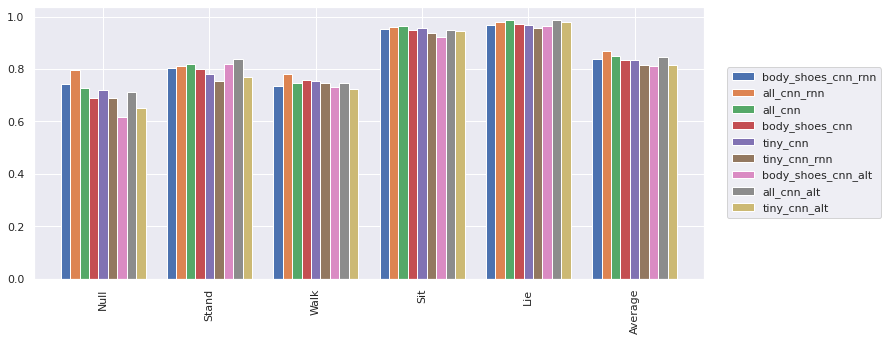

In [ ]:
_ = df.plot(kind = 'bar', figsize = (12,5), width = 0.8)
_ = plt.legend(bbox_to_anchor=(1.15, 0.5), loc=10, borderaxespad=0.)

## Barplot per subset
Be careful! This plot depends on the data of the previous one. They must be run sequentially.

In [ ]:
df2 = pd.DataFrame(df.loc['Average'].values.reshape(3,3),
                   index=['All accelerometers and IMUs',
                          'All accelerometers and shoes',
                          'RKN, HIP, BACK, RWR and shoes'],
                   columns=['CNN 2D', 'CNN alt', 'CNN+RNN'])
df2

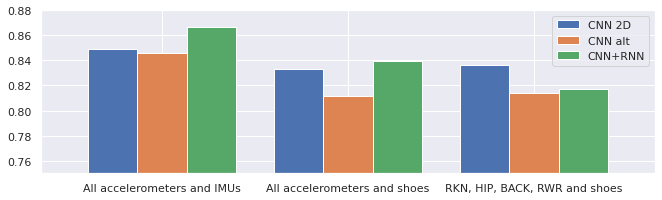

In [ ]:
_ = df2.plot(kind = 'bar', figsize = (11,3), width = 0.8)
_ = plt.ylim(0.75, 0.88)
_ = plt.xticks(rotation=0)

#plt.savefig(DIR_PATH + 'plots/barplot.pdf')